# Homework 7 - Nina Braunmiller - k11923286 - 21.11.21

## Example 1

In [16]:
#install.packages('lme4')


In [17]:
library(lme4)


### Visualizing data

In [18]:
str(sleepstudy)


'data.frame':	180 obs. of  3 variables:
 $ Reaction: num  250 259 251 321 357 ...
 $ Days    : num  0 1 2 3 4 5 6 7 8 9 ...
 $ Subject : Factor w/ 18 levels "308","309","310",..: 1 1 1 1 1 1 1 1 1 1 ...
  ..- attr(*, "contrasts")= num [1:18, 1:17] 1 0 0 0 0 0 0 0 0 0 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr  "308" "309" "310" "330" ...
  .. .. ..$ : NULL


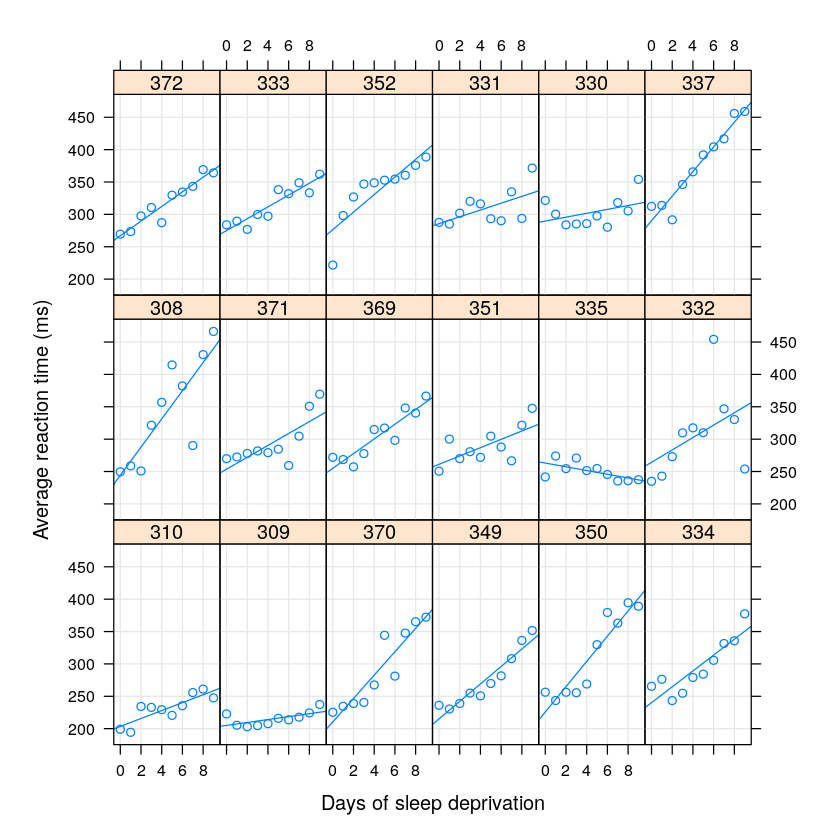

In [19]:
require(lattice)
xyplot(Reaction ~ Days | Subject, sleepstudy, type = c("g","p","r"),
       index = function(x,y) coef(lm(y ~ x))[1],
       xlab = "Days of sleep deprivation",
       ylab = "Average reaction time (ms)", aspect = "xy")


### linear model with intercept and days of covariate

In [36]:
(linear_model1 <- lm(sleepstudy$Reaction ~ sleepstudy$Days))



Call:
lm(formula = sleepstudy$Reaction ~ sleepstudy$Days)

Coefficients:
    (Intercept)  sleepstudy$Days  
         251.41            10.47  


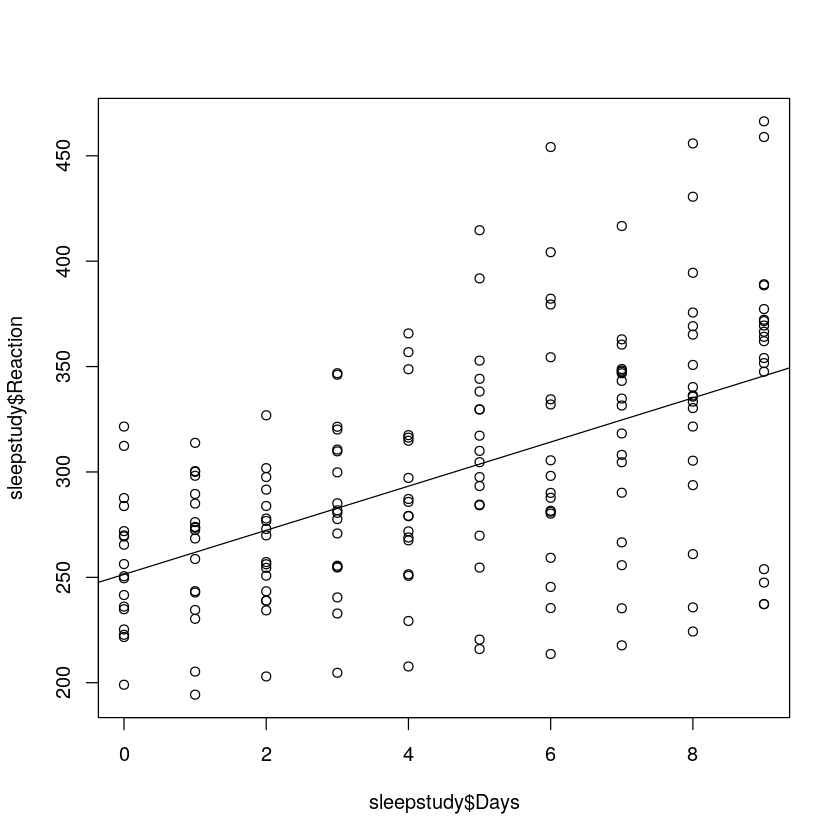

In [21]:
plot(sleepstudy$Days,sleepstudy$Reaction)
abline(linear_model1)


### linear model with days, subjects and their interaction

In [35]:
# First take care of zero to sum for subject ID:
contr.matrix <- contr.sum(18) # 18 because we have 18 rows in the contrasts(sleepstudy$Subject). That's because
# we have 18 probands.
contrasts(sleepstudy$Subject)<- contr.matrix

# Then create the linear model:
(linear_model2 <- lmer(Reaction ~ Days + (Subject) + (0+Days|Subject), sleepstudy))


Linear mixed model fit by REML ['lmerMod']
Formula: Reaction ~ Days + (Subject) + (0 + Days | Subject)
   Data: sleepstudy
REML criterion at convergence: 1584.165
Random effects:
 Groups   Name Std.Dev.
 Subject  Days  5.922  
 Residual      25.592  
Number of obs: 180, groups:  Subject, 18
Fixed Effects:
(Intercept)         Days     Subject1     Subject2     Subject3     Subject4  
   251.4051      10.4673       2.1711     -53.1656     -51.5359      32.0844  
   Subject5     Subject6     Subject7     Subject8     Subject9    Subject10  
    30.0137      12.0985      22.5133      -9.7589       0.5426      45.8078  
  Subject11    Subject12    Subject13    Subject14    Subject15    Subject16  
   -33.7794     -18.0647       6.3915      27.5412       4.2946     -34.6528  
  Subject17  
     1.1687  

### Comparison

For linear_model1: Intercept: for day 0 our model tells us that a proband would need 251.4 ms to react. Our model has a days covariate value of 10.47 gives us the slope in which the reaction time increases for each day. <br>
For linear_model2: 'Subject' describes here the proband who participated in the study. So, we get the about course of each proband in their reaction times. For example, for Subject1 we have 2.1711>0 such that in total the reaction time increases. For Subject11 however we have -33.7794<0 and we observe a decreasing reaction time. Simply, have a look in the visualization.

## Example 2

In [23]:
#install.packages('matrixcalc')


In [24]:
library(matrixcalc)


In [25]:
X <- cbind(c(1,1,1,1),c(0,1,0,0),c(0,0,1,0),c(0,0,0,1))
v <- solve(t(X) %*% X) # getting the inverse
v


1,-1,-1,-1
-1,2,1,1
-1,1,2,1
-1,1,1,2


\begin{align*}
\text{aim:} \frac{V[\hat{\alpha}]}{2}\\
&= \frac{V[(X^T X)^{-1}X^Ty]}{2} = \frac{(X^T X)^{-1}X^T X (X^T X)^{-1} V[y]}{2}
= \frac{(X^T X)^{-1} V(y)}{2} = \frac{(X^T X)^{-1} \sigma^2}{2} = \frac{(X^T X)^{-1} \cdot 1}{2} \\
\text{informally written:} &= \frac{1}{(X^T X)\cdot2} = \frac{1}{\sqrt{2} \cdot X^T \sqrt{2} \cdot X }
\end{align*}
Keep in mind: We don't talk here about $\alpha_0$! So, the solution procedure is not precisely written above. For the first column of X we have the $\alpha_0$ weighting. This column won't be multiplied with $\sqrt{2}$. What will happen with $\alpha_0$?:
\begin{align*}
\hat{\alpha_0} = y_0 \\
V[\hat{\alpha_0}] = V[y_0] = \sigma^2 
\end{align*}
The variance for $\hat{\alpha_0}$ is already $\sigma^2 $. Therefore, the first column of X stays as it is.<br>
<br>
This leads us to the final X:

In [26]:
X_solution <- cbind(c(1,1,1,1),c(0,1*sqrt(2),0,0),c(0,0,1*sqrt(2),0),c(0,0,0,1*sqrt(2)))
v_solution <- solve(t(X_solution) %*% X_solution) # getting the inverse
v_solution


1.0000000,-0.7071068,-0.7071068,-0.7071068
-0.7071068,1.0000000,0.5000000,0.5000000
-0.7071068,0.5000000,1.0000000,0.5000000
-0.7071068,0.5000000,0.5000000,1.0000000


As you can see the diagonals of the variance matrix v aren't any longer 2 but 1. 

## Example 3

In [27]:
prices <- c(1.21,1.2,1.21,1.22,1.23,1.24,1.24,1.26,1.25,1.27,1.28,1.29,1.31,1.32,1.33,1.35,1.36,1.38,1.38,1.38,1.39,1.4,1.4,1.41,1.43,1.42,1.42,1.42,1.43,1.43,1.44,1.45,1.46,1.48,1.48,1.49,1.5,1.5,1.5,1.5,1.5,1.49,1.5,1.5,1.5,1.5,1.6,1.57,1.58,1.59)
prices <- cummax(prices) # take old value when the new value falls
time <- c(1:length(prices))
Y <- lm(prices~time)


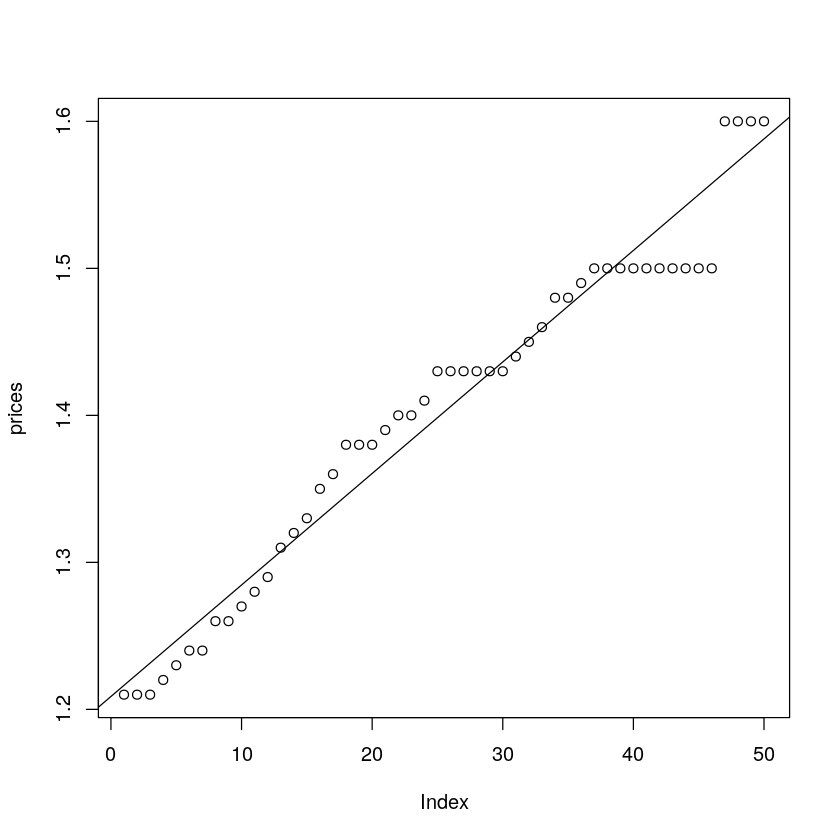

In [28]:
plot(prices)
abline(Y)


In [34]:
b <- Y$coef[2]
X <- Matrix(0,length(prices),length(prices))
diag(X) <- b

a <- Y$coef[1]
X[1:length(prices)] = a

X
# of course you cold also only make an 1x2 matrix with first input= a and the second 
# one = b. 


50 x 50 sparse Matrix of class "dtCMatrix"
                                                                          
 [1,] 1.208767 .           .           .           .           .          
 [2,] 1.208767 0.007585594 .           .           .           .          
 [3,] 1.208767 .           0.007585594 .           .           .          
 [4,] 1.208767 .           .           0.007585594 .           .          
 [5,] 1.208767 .           .           .           0.007585594 .          
 [6,] 1.208767 .           .           .           .           0.007585594
 [7,] 1.208767 .           .           .           .           .          
 [8,] 1.208767 .           .           .           .           .          
 [9,] 1.208767 .           .           .           .           .          
[10,] 1.208767 .           .           .           .           .          
[11,] 1.208767 .           .           .           .           .          
[12,] 1.208767 .           .           .           .     

In [30]:
v <- solve(t(X) %*% X)
v


50 x 50 sparse Matrix of class "dgCMatrix"
                                                                         
 [1,]    0.6844072  -109.0605  -109.0605  -109.0605  -109.0605  -109.0605
 [2,] -109.0605472 34757.6799 17378.8400 17378.8400 17378.8400 17378.8400
 [3,] -109.0605472 17378.8400 34757.6799 17378.8400 17378.8400 17378.8400
 [4,] -109.0605472 17378.8400 17378.8400 34757.6799 17378.8400 17378.8400
 [5,] -109.0605472 17378.8400 17378.8400 17378.8400 34757.6799 17378.8400
 [6,] -109.0605472 17378.8400 17378.8400 17378.8400 17378.8400 34757.6799
 [7,] -109.0605472 17378.8400 17378.8400 17378.8400 17378.8400 17378.8400
 [8,] -109.0605472 17378.8400 17378.8400 17378.8400 17378.8400 17378.8400
 [9,] -109.0605472 17378.8400 17378.8400 17378.8400 17378.8400 17378.8400
[10,] -109.0605472 17378.8400 17378.8400 17378.8400 17378.8400 17378.8400
[11,] -109.0605472 17378.8400 17378.8400 17378.8400 17378.8400 17378.8400
[12,] -109.0605472 17378.8400 17378.8400 17378.8400 17378.8400 17378.

The slope b=0.007585594 is very small for my data. Therefore, when we multiply a small number with itself (here $X^T X$) it becomes even smaller. When we then divide 1 by a very small number,  we get a very large one (here $v=(X^T X)^{-1}$) (here $\frac{1}{verySmall \cdot verySmall} = veryBig = 34757.6799$ ).<br><br>
In contrast, the intercept a=1.208767 is around 1. When we have $\frac{1}{around1 \cdot around1} = circaAround1 = 0.6844072$.

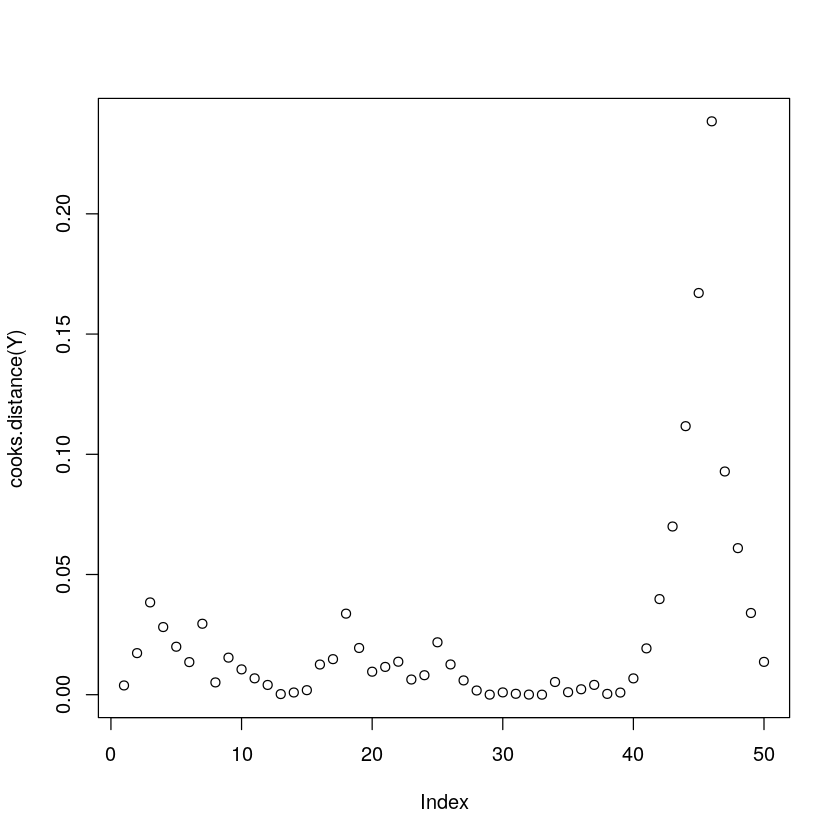

In [32]:
plot(cooks.distance(Y))


There doesn't seem to be an influential point because for all points we have: Cook's distance < 0.5. Also when you have a look at the plotting of the data point and the linear regression line above, there seems to be no flashy data sample. 

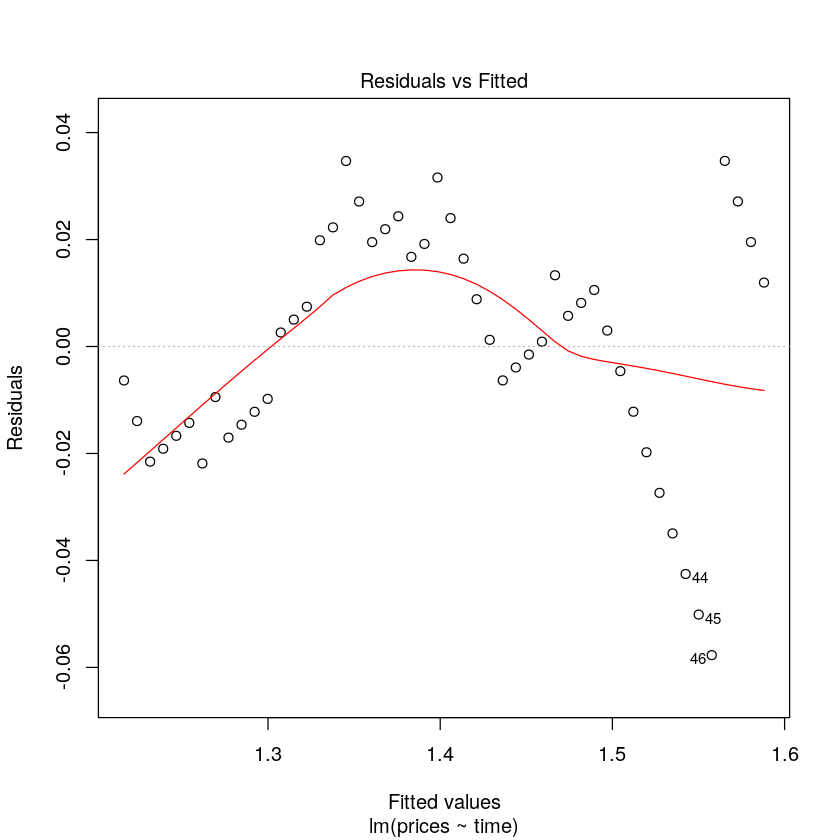

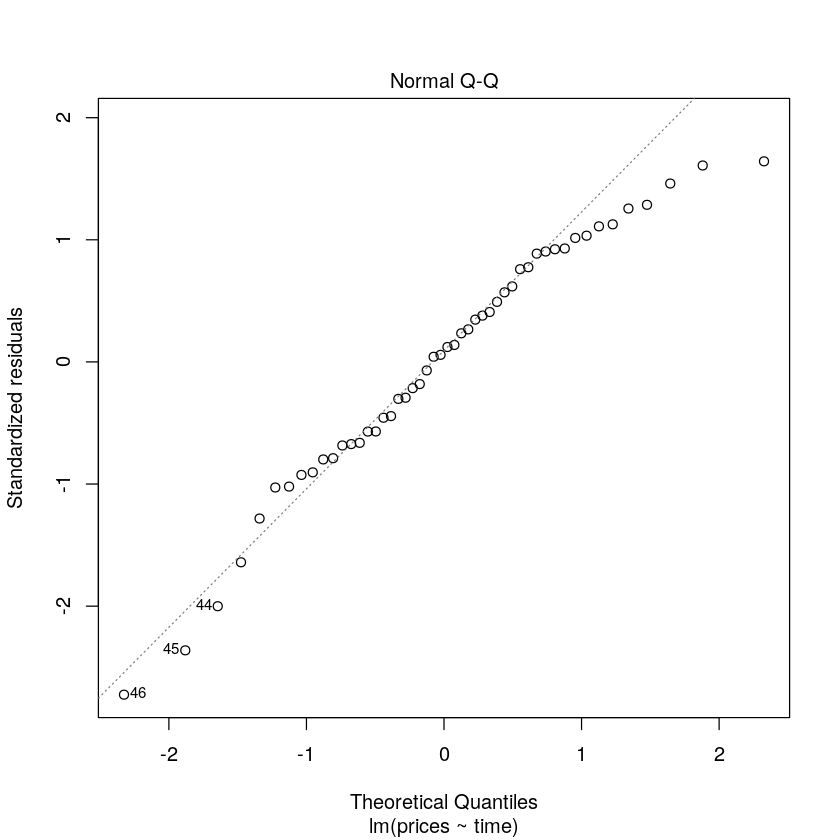

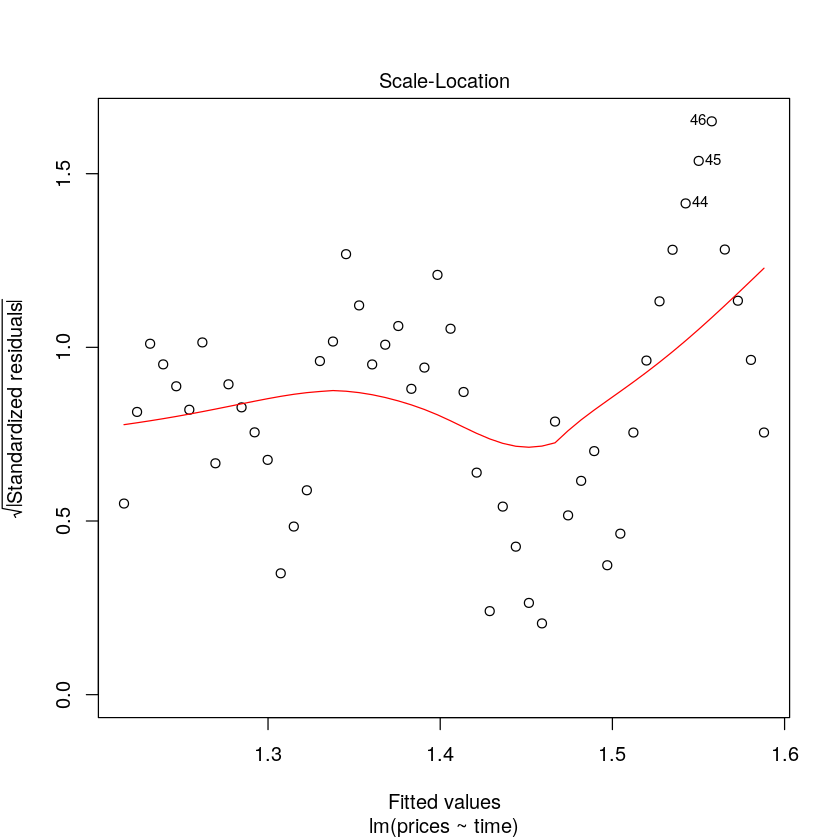

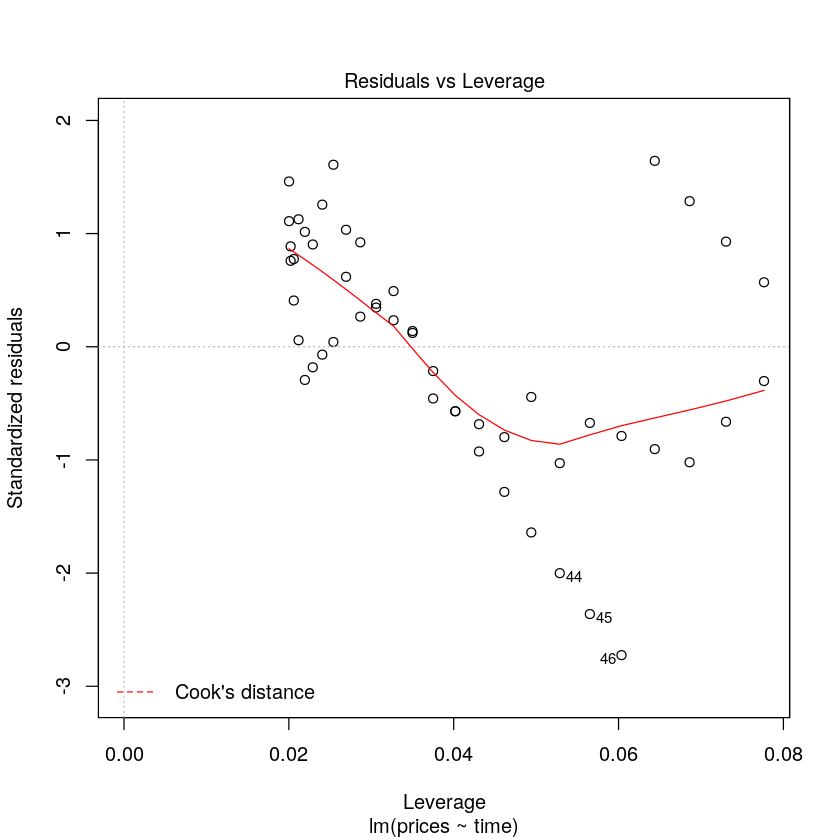

In [33]:
plot(Y)


Also here nothing flashy about influential points.

Conclusion: We can't observe any influential data points or outliers. However, the slope b is very small becauce here the price development was catched over a small period of time in more detail. Therfore, its variance become large. 

Side remark: When we talk about 'a' and 'b' in this task, the estimated values $\hat{a}$ and $\hat{b}$ are meant.